In [1]:
from __future__ import division

from sympy.interactive.printing import init_printing

# init_printing(use_unicode=False, wrap_line=False, use_latex="mathjax")

init_printing(use_unicode=False, wrap_line=False)
# from sympy.interactive import init_session
# init_session() 
from sympy.matrices import Matrix, eye, zeros, diag
from sympy import symbols, diff
import sympy as sp
import numpy as np

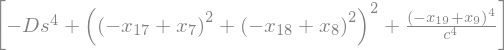

In [2]:
def norm2(_x):
    return sp.sqrt(_x.T @ _x)


c = sp.symbols('c', real=True)
Ds = Matrix([sp.symbols('Ds')], real=True)

e7 = Matrix([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
e8 = Matrix([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
e9 = Matrix([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
Exy = Matrix([e7.T, e8.T])
Ez = e9.T


def h(eij):
    return norm2(Exy @ (eij)) ** 4 + ((Ez / c) @ (eij)) ** 4 - Ds ** 4


eij = Matrix(sp.symbols('e:10', real=True))
x1 = Matrix(sp.symbols('x:10', real=True))
x2 = Matrix(sp.symbols('x10:20', real=True))
x = x1.col_join(x2)
xdes1 = Matrix(sp.symbols('xdes:10', real=True))
xdes2 = Matrix(sp.symbols('xdes10:20', real=True))
xhat = (x1 - xdes1).col_join(x2-xdes2)
xhij = h(x1 - x2)
hij = h(eij)
xhij

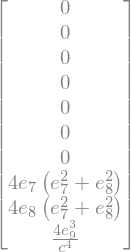

In [3]:
sym_dhde = Matrix([diff(hij, e) for e in eij])
sym_dhde

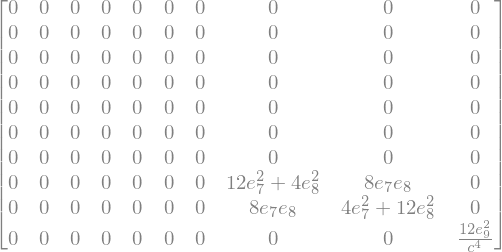

In [4]:
sym_dhde2 = Matrix([diff(sym_dhde, e).T for e in eij])
sym_dhde2

(100, 10)


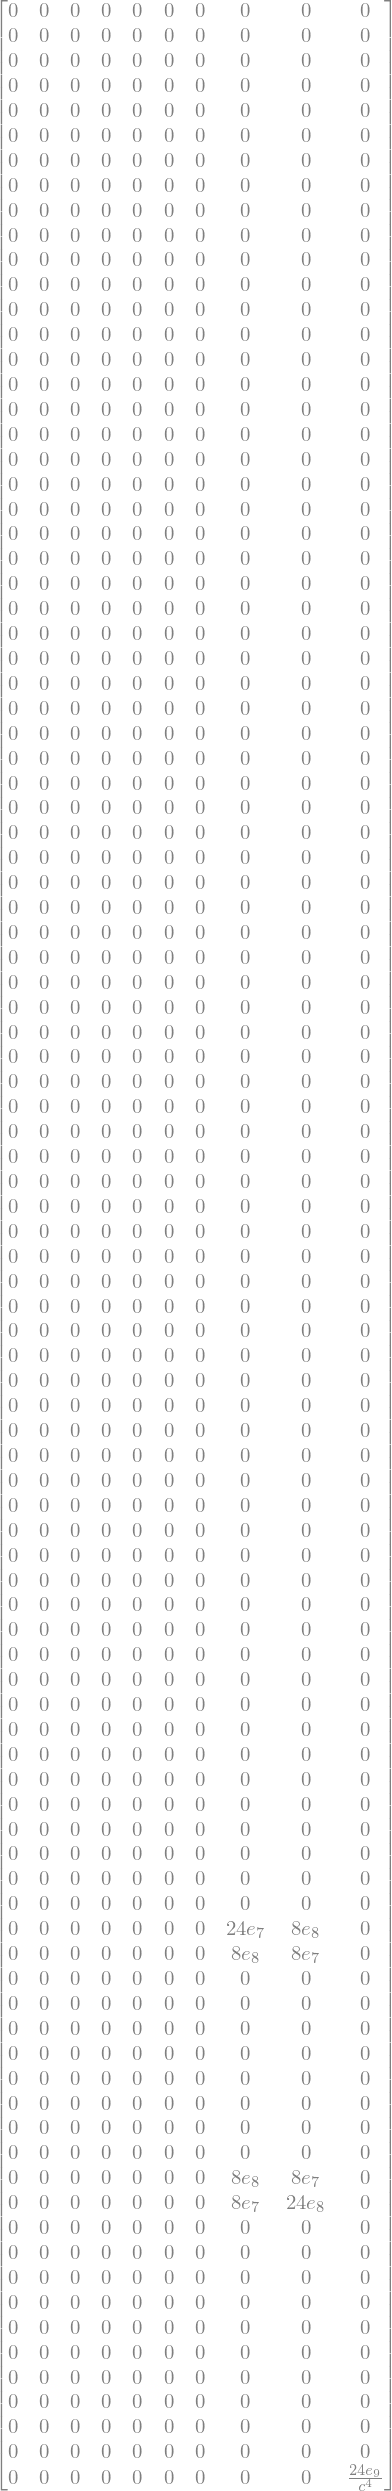

In [5]:
sym_dhde3 = sp.Matrix([diff(sym_dhde2, e) for e in eij])
print(sym_dhde3.shape)
sym_dhde3[:, :]

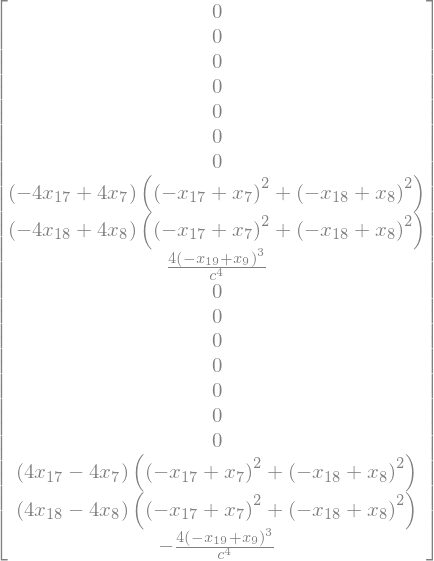

In [6]:
sym_dhdx = Matrix([diff(xhij, xs) for xs in x])
sym_dhdx

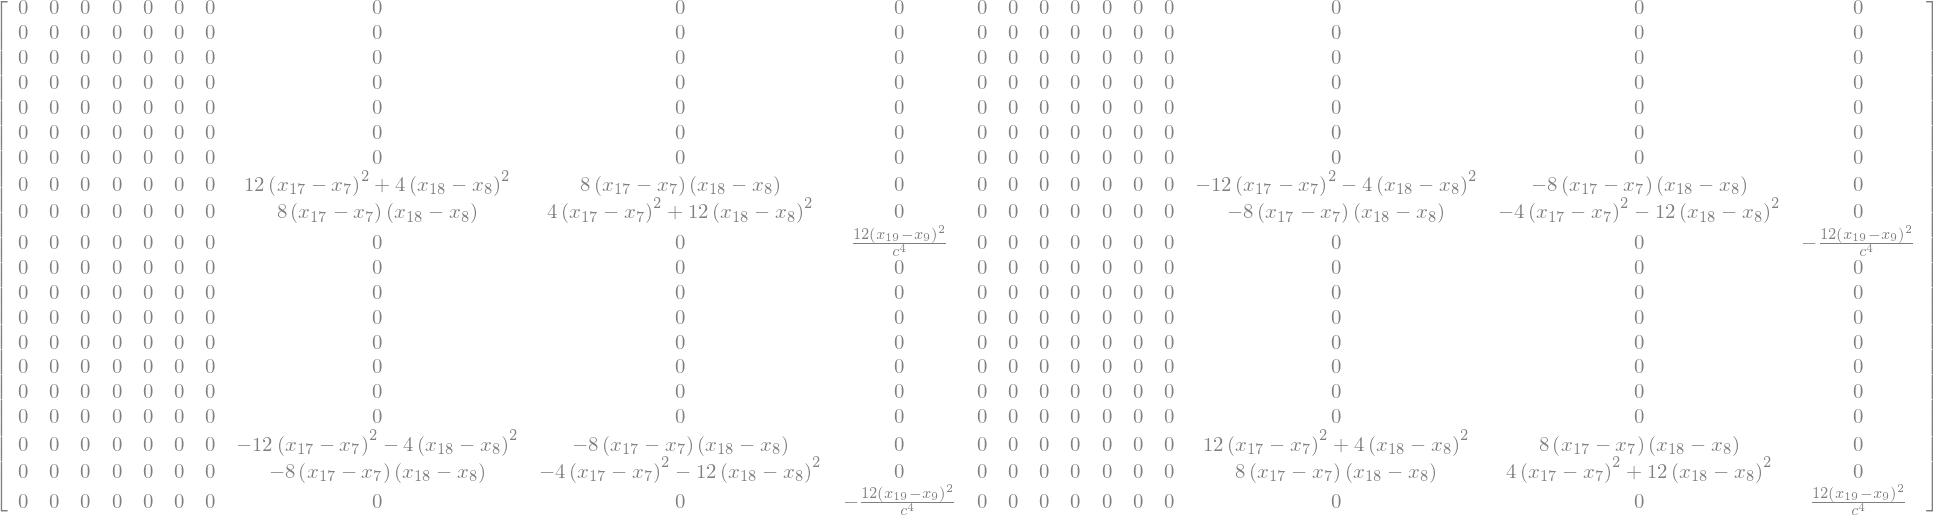

In [7]:
sym_dhdx2 = Matrix([diff(sym_dhdx, xs).T for xs in x])
sym_dhdx2.simplify()
sym_dhdx2.shape
sym_dhdx2

(20, 20)


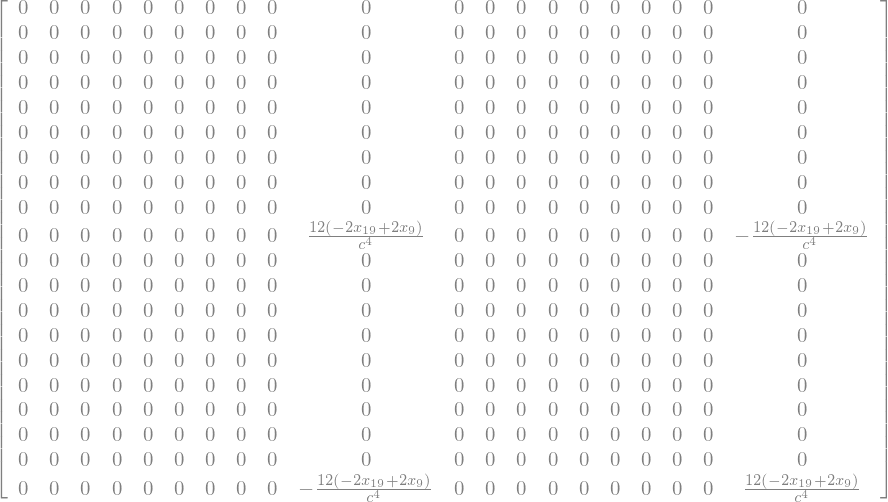

In [8]:
sym_dhdx3 = [diff(sym_dhdx2, xs) for xs in x]
print(sym_dhdx3[0].shape)
sym_dhdx3[9][:, :]

In [9]:
A1 = zeros(10, 10, real=True)
B1 = zeros(10, 4, real=True)
A2 = zeros(10, 10, real=True)
B2 = zeros(10, 4, real=True)
g = symbols('g', real=True)
mass = symbols('m', real=True)
u = Matrix(symbols('u:8', real=True))
A1[7:, 4:7] = eye(3)
A1[4, 1] = g
A1[5, 0] = -g
A1[6, 3] = 1.0 / mass  # vz dot = 1/mass * F
B1[:3, 1:] = eye(3)
B1[3, 0] = 1.0  # F dot = Yank

A2[7:, 4:7] = eye(3)
A2[4, 1] = g
A2[5, 0] = -g
A2[6, 3] = 1 / mass  # vz dot = 1/mass * F
B2[:3, 1:] = eye(3)
B2[3, 0] = 1  # F dot = Yank

A = diag([A1, A2], unpack=True)
B = diag([B1, B2], unpack=True)


In [10]:
def hand_dhdx(eij):
    dhde = zeros(10)
    ex = eij[7]
    ey = eij[8]
    ez = eij[9]
    dhde[7] = 4 * ex * (ex ** 2 + ey ** 2)
    dhde[8] = 4 * ey * (ex ** 2 + ey ** 2)
    dhde[9] = 4 * ez ** 3 / c ** 4
    dhdx = zeros(2 * 10,1)
    print(dhdx.shape)
    for i in range(10):
        dhdx[i] = dhde[i]
        dhdx[i + 10] = -dhde[i]
    return dhdx

def hand_dh2hx2(eij):
    ex = eij[7]
    ey = eij[8]
    ez = eij[9]
    d2hde2 = zeros(10, 10)
    d2hde2[7, 7] = 12 * ex ** 2 + 4 * ey ** 2
    d2hde2[7, 8] = 8 * ex * ey
    d2hde2[8, 7] = 8 * ex * ey
    d2hde2[8, 8] = 4 * ex ** 2 + 12 * ey ** 2
    d2hde2[9, 9] = 12 * ez ** 2 / c ** 4
    d2hdx2 = zeros(2 * 10, 2 * 10)
    d2hdx2[:10, :10] = d2hde2
    d2hdx2[10:, 10:] = d2hde2
    d2hdx2[:10, 10:] = -d2hde2
    d2hdx2[10:, :10] = -d2hde2
    
    return d2hdx2

def hand_dh3hx3(eij):
    ex = eij[7]
    ey = eij[8]
    ez = eij[9]
    

    d3hde3 = sp.MutableDenseNDimArray.zeros(10, 10, 10)
    # im writing this with, depth, row, column
    d3hde3[7, 7, 7] = 24 * ex
    d3hde3[7, 7, 8] = 8 * ey
    d3hde3[7, 8, 7] = 8 * ey
    d3hde3[7, 8, 8] = 8 * ex

    d3hde3[8, 8, 8] = 24 * ey
    d3hde3[8, 7, 7] = 8 * ey
    d3hde3[8, 7, 8] = 8 * ex
    d3hde3[8, 8, 7] = 8 * ex
    d3hde3[9, 9, 9] = 24 * ez / c ** 4

    d3hdx3 = sp.MutableDenseNDimArray.zeros(2 * 10, 2 * 10, 2 * 10)
    d3hdx3[:10, :10, :10] = d3hde3
    d3hdx3[:10, 10:, 10:] = d3hde3
    d3hdx3[:10, 10:, :10] = -d3hde3
    d3hdx3[:10, :10, 10:] = -d3hde3

    d3hdx3[10:, 10:, 10:] = -d3hde3
    d3hdx3[10:, :10, :10] = -d3hde3
    d3hdx3[10:, 10:, :10] = d3hde3
    d3hdx3[10:, :10, 10:] = d3hde3
    return d3hdx3

def vector_tensor_product(v, Tensor):
    #this was verified against numpy vector tensor product for the relevant matrices, but they are symmetric so it may depend on the axis that is multiplied on. 
    # v is a vector, Tensor is a 3D tensor
    #multiply on the last axis
    result = Matrix.zeros(Tensor.shape[1], Tensor.shape[2])
    for i in range(Tensor.shape[1]):
        for j in range(Tensor.shape[2]):
            for k in range(Tensor.shape[0]):
                result[i, j] += v[k] * Tensor[k, i, j]
    return result
    
    

def hand_h3dot(eij):
    d3hdx3 = hand_dh3hx3(eij)
    d2hdx2 = hand_dh2hx2(eij)
    dhdx = hand_dhdx(eij)
    
    Axhat = A @ xhat
    AA = A @ A
    AxhatTimesd3hdx3 = vector_tensor_product(Axhat, d3hdx3)
    ddxL2h = dhdx.T @ AA + (AA @ xhat).T @ d2hdx2 + Axhat.T @ (
            d2hdx2 @ A + AxhatTimesd3hdx3) + (d2hdx2 @ Axhat).T @ A
    Lfh = ddxL2h @ Axhat
    LgLfh = ddxL2h @ B
    h3dot = Lfh + LgLfh @ u
    return h3dot

def hand_h2dot(eij):
    d2hdx2 = hand_dh2hx2(eij)
    dhdx = hand_dhdx(eij)
    Axhat = A @ xhat
    Lfh = dhdx.T @ A @ Axhat + Axhat.T @ d2hdx2 @ Axhat

    LgLfh = dhdx.T @ A @ B + Axhat.T @ d2hdx2 @ B
    h2dot = Lfh + LgLfh @ u
    return h2dot

my_dhdx = hand_dhdx(eij)
my_dh2dx2 = hand_dh2hx2(eij)
my_dh3dx3 = hand_dh3hx3(eij)
my_h3dot = hand_h3dot(eij)
my_h2dot = hand_h2dot(eij)


(20, 1)
(20, 1)
(20, 1)


In [19]:
my_dhde = my_dhdx[:10]
e_2_x = sp.Matrix.vstack(eye(10), -eye(10)).T
test_dhdx = sp.Matrix(my_dhde).T @ e_2_x
test_dhdx @ B
# sp.Matrix(my_dhde).T @ B

In [35]:

for i in range(10):
    my_dhdx = my_dhdx.subs(eij[i], x1[i] - x2[i])
    my_dh2dx2 = my_dh2dx2.subs(eij[i], x1[i] - x2[i])

In [36]:
#compare

def compare_results(res1, res2):
    difference = res1 - res2
    difference.simplify()
    found_nonzero = False
    for i in range(difference.shape[0]):
        for j in range(difference.shape[1]):
            if difference[i, j] != 0:
                found_nonzero = True
                print(i, j, difference[i, j])
    
    if not found_nonzero:
        print('All zeros')
    else:
        print('Not all zeros')


In [37]:
compare_results(sym_dhdx, my_dhdx)
compare_results(sym_dhdx2, my_dh2dx2)

All zeros
All zeros


In [38]:
sym_dhdx3_arr = sp.MutableDenseNDimArray.zeros(20, 20, 20)
for i in range(20):
    sym_dhdx3_arr[i, :, :] = sp.MutableDenseNDimArray(sym_dhdx3[i])
    
print(sym_dhdx3_arr.shape)

(20, 20, 20)


In [39]:
#compare tensors
def compare_tensor_results(res1, res2):
    diff_list = []
    difference = res1 - res2
    found_nonzero = False
    for i in range(difference.shape[0]):
        for j in range(difference.shape[1]):
            for k in range(difference.shape[2]):
                for l in range(10):
                    difference[i,j,k] = difference[i,j,k].subs(eij[l], x1[l] - x2[l])
                store = difference[i, j, k]
                store = store.simplify()
                if store != 0:
                    found_nonzero = True
                    diff_list.append((i, j, k, store))
                    print(i, j, k, store)
    
    if not found_nonzero:
        print('All zeros')
    else:
        print('Not all zeros')
    return diff_list
diff_list = compare_tensor_results(sym_dhdx3_arr, my_dh3dx3)

All zeros


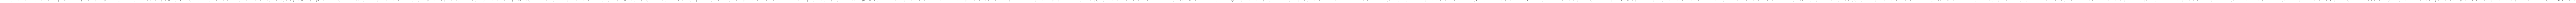

In [40]:
xdot = A @ xhat + B @ u
hdot = sym_dhdx.T @ xdot
hdot.simplify()

h2dot = hdot.jacobian(x) @ xdot
h2dot.simplify()

dh2dotdx = h2dot.jacobian(x)
dh2dotdx.simplify()

h3dot = dh2dotdx @ xdot
h3dot.simplify()
h3dot

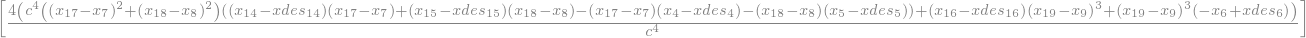

In [23]:
hdot

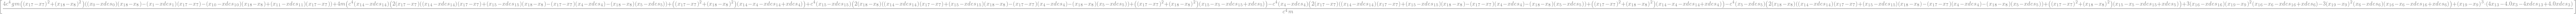

In [24]:
h2dot

In [17]:
for i in range(10):
    my_h2dot = my_h2dot.subs(eij[i], x1[i] - x2[i])
    my_h3dot = my_h3dot.subs(eij[i], x1[i] - x2[i])

In [18]:
diff_h2dot = my_h2dot[0] - h2dot[0]
def sample_random(expr):
    x1rand = np.random.rand(10)
    x2rand = np.random.rand(10)
    urand = np.random.rand(8)
    crand = np.random.rand(1)
    Dsrand = np.random.rand(1)
    massrand = np.random.rand(1)
    grand = np.random.rand(1)
    xdes1rand = np.random.rand(10)
    xdes2rand = np.random.rand(10)
    expr = expr.subs(c, crand[0])
    expr = expr.subs(Ds, Dsrand[0])
    expr = expr.subs(mass, massrand[0])
    expr = expr.subs(g, grand[0])
    for i in range(10):
        expr = expr.subs(x1[i], x1rand[i])
        expr = expr.subs(x2[i], x2rand[i])
        expr = expr.subs(xdes1[i], xdes1rand[i])
        expr = expr.subs(xdes2[i], xdes2rand[i])
    for i in range(8):
        expr = expr.subs(u[i], urand[i])
    print(expr)
    return expr
sample_random(diff_h2dot)

-1.17961196366423e-15


In [19]:

h3dot_exp = h3dot[0].expand()
my_h3dot_exp = my_h3dot[0].expand()
bool_eq = bool(h3dot_exp == my_h3dot_exp)
print(bool_eq) 

True


In [20]:

difference_h3dot = my_h3dot_exp - h3dot_exp

difference_h3dot = difference_h3dot.simplify()

print(difference_h3dot)

0


In [21]:
difference_h3dot = difference_h3dot.simplify()
difference_h3dot = difference_h3dot.subs(c, 1)
difference_h3dot = difference_h3dot.subs(Ds, 2)
difference_h3dot = difference_h3dot.subs(mass, 3)
difference_h3dot = difference_h3dot.subs(g, 9.8)
difference_h3dot = difference_h3dot.subs(u[0], 1).subs(u[1], 2).subs(u[2], 3).subs(u[3], 4).subs(u[4], 5).subs(u[5], 6).subs(u[6], 7).subs(u[7], 8)
difference_h3dot = difference_h3dot.simplify()
difference_h3dot = difference_h3dot.subs(x1[0], 1).subs(x1[1], 2).subs(x1[2], 3).subs(x1[3], 4).subs(x1[4], 5).subs(x1[5], 6).subs(x1[6], 7).subs(x1[7], 8).subs(x1[8], 9).subs(x1[9], 10)
difference_h3dot = difference_h3dot.subs(x2[0], 1.01).subs(x2[1], 2.02).subs(x2[2], 3.03).subs(x2[3], 4.05).subs(x2[4], 5.09).subs(x2[5], 6.011).subs(x2[6], 7.013).subs(x2[7], 8.017).subs(x2[8], 9.023).subs(x2[9], 10.31)

In [22]:
difference_h3dot